Travelling salesman problem

Developer: Tanmoy Das
Date: July 10, 2024

## TSP for 10 cities in Florida

['Miami', 'Naples', 'Sarasota', 'Tampa', 'Orlando', 'Jacksonville', 'Tallahassee', 'Pensacola', 'West Palm Beach', 'Fort Lauderdale', 'Miami']


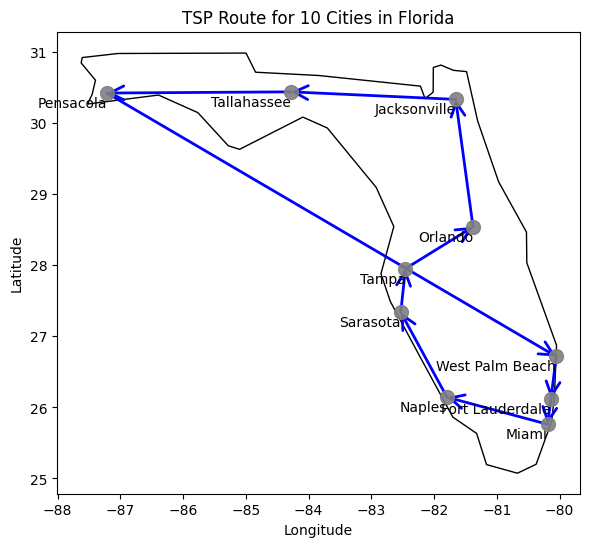

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from math import sqrt

# Step 1: Define the cities and their coordinates
cities = {
    "Miami": (25.7617, -80.1918),
    "Orlando": (28.5383, -81.3792),
    "Tampa": (27.9506, -82.4572),
    "Jacksonville": (30.3322, -81.6557),
    "Tallahassee": (30.4383, -84.2807),
    "Fort Lauderdale": (26.1224, -80.1373),
    "Naples": (26.1420, -81.7948),
    "Pensacola": (30.4213, -87.2169),
    "Sarasota": (27.3364, -82.5307),
    "West Palm Beach": (26.7153, -80.0534)
}

# Step 2: Create a graph and add nodes
#fig, ax = plt.subplots(figsize=(8, 8))
G = nx.Graph()
for city, coords in cities.items():
    G.add_node(city, pos=coords)

# Step 3: Add edges with distances (using Euclidean distance for simplicity)
def euclidean_distance(coord1, coord2):
    return sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

for city1, coord1 in cities.items():
    for city2, coord2 in cities.items():
        if city1 != city2:
            G.add_edge(city1, city2, weight=euclidean_distance(coord1, coord2))
#nx.draw(G)
#plt.show()
# Step 4: Solve the TSP using a heuristic approach
from networkx.algorithms.approximation import traveling_salesman_problem
tsp_route = traveling_salesman_problem(G, cycle=True)
print(tsp_route)

# Step 5: Plot the TSP route on a GIS map
# Load the shapefile of US states
states = gpd.read_file('../data/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')


# Filter for Florida (assuming 'name' column contains state names)
florida = states[states['name'] == 'Florida']

fig, ax = plt.subplots(figsize=(6, 6))
florida.plot(ax=ax, color='white', edgecolor='black')

# Plot cities
x = [cities[city][1] for city in cities]
y = [cities[city][0] for city in cities]
plt.scatter(x, y, c='gray', marker='o', s=100, alpha=0.9, zorder=4)

# Annotate cities
for city, (lat, lon) in cities.items():
    plt.text(lon, lat-0.2, city, fontsize=10, ha='right')

# Plot TSP route    
route_coords = [cities[city] for city in tsp_route]
for i in range(len(route_coords) - 1):
    start = route_coords[i]
    end = route_coords[i + 1]
    plt.annotate(
        '', xy=(end[1], end[0]), xytext=(start[1], start[0]),
        arrowprops=dict(arrowstyle="->,head_width=0.5,head_length=1", color='blue', lw=2, 
                        shrinkA=0, shrinkB=0),
        zorder=2
    )

plt.title('TSP Route for 10 Cities in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.savefig('tsp_route.png')
plt.show()

## Model Formulation and Pyomo implementation

In [2]:
# Example Usage
from tsp_model import TravelingSalesmanProblem
num_cities = 20
tsp = TravelingSalesmanProblem(num_cities)
distance_matrix = tsp.generate_distance_matrix()
model = tsp.create_model()
route = tsp.solve()
tsp.print_route(route)

result.Solver.status result.Solver.status=<SolverStatus.ok: 'ok'>
Optimal Route:
City 1 -> City 17
City 2 -> City 14
City 3 -> City 15
City 4 -> City 1
City 5 -> City 6
City 6 -> City 12
City 7 -> City 13
City 8 -> City 16
City 9 -> City 18
City 10 -> City 5
City 11 -> City 7
City 12 -> City 8
City 13 -> City 3
City 14 -> City 10
City 15 -> City 2
City 16 -> City 9
City 17 -> City 20
City 18 -> City 19
City 19 -> City 4
City 20 -> City 11


## Genetic Algorithm for TSP

In [3]:
from genetic_algorithm_tsp import GeneticAlgorithmTSP 
import numpy as np
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# Parameters for the GA
pop_size = 10
num_generations = 20
mutation_rate = 0.01

# data 
num_cities = 6
# Generate a random distance matrix for the GA
distance_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))
np.fill_diagonal(distance_matrix, 0)  # Distance from a city to itself is 0

# Solve TSP using the Genetic Algorithm
ga_tsp_solver = GeneticAlgorithmTSP(distance_matrix, pop_size, num_generations, mutation_rate)
best_path, best_distance = ga_tsp_solver.evolve_population()

print("\nBest Path:", best_path)
print("Best Distance:", best_distance)

Initial population:  [[5, 1, 0, 3, 2, 4], [5, 2, 0, 1, 3, 4], [2, 0, 5, 1, 4, 3], [0, 4, 5, 3, 2, 1], [2, 4, 3, 1, 0, 5], [0, 2, 3, 5, 4, 1], [5, 3, 0, 1, 2, 4], [2, 4, 5, 1, 3, 0], [0, 5, 1, 4, 2, 3], [5, 2, 4, 1, 0, 3]]
Initial population:  [[3, 5, 0, 1, 2, 4], [2, 5, 3, 0, 1, 4], [1, 0, 5, 3, 2, 4], [1, 4, 3, 0, 5, 2], [4, 2, 5, 1, 0, 3], [4, 1, 5, 2, 0, 3], [1, 0, 3, 5, 2, 4], [2, 4, 5, 1, 0, 3], [0, 5, 1, 4, 2, 3], [2, 0, 5, 1, 4, 3]]
Initial population:  [[5, 0, 1, 4, 2, 3], [4, 2, 3, 1, 0, 5], [0, 1, 4, 3, 2, 5], [3, 4, 0, 1, 2, 5], [4, 0, 3, 2, 5, 1], [2, 4, 3, 0, 1, 5], [4, 0, 3, 5, 2, 1], [2, 5, 1, 4, 0, 3], [4, 2, 5, 1, 0, 3], [3, 5, 4, 2, 1, 0]]
Initial population:  [[0, 4, 3, 5, 2, 1], [0, 5, 4, 2, 1, 3], [5, 4, 3, 0, 1, 2], [2, 5, 1, 4, 3, 0], [4, 0, 3, 2, 5, 1], [5, 1, 3, 2, 4, 0], [1, 0, 3, 4, 2, 5], [4, 0, 3, 2, 5, 1], [5, 0, 1, 2, 4, 3], [2, 4, 5, 0, 1, 3]]
Initial population:  [[0, 1, 3, 2, 4, 5], [4, 0, 1, 2, 5, 3], [2, 4, 5, 1, 0, 3], [0, 1, 3, 4, 2, 5], [4, 0, 2, 

## Nearest Neighbor Heuristic


Aprroximation Tour: [0, 5, 3, 1, 5, 0, 2, 0, 4, 0]
Approximation Tour Cost: 153


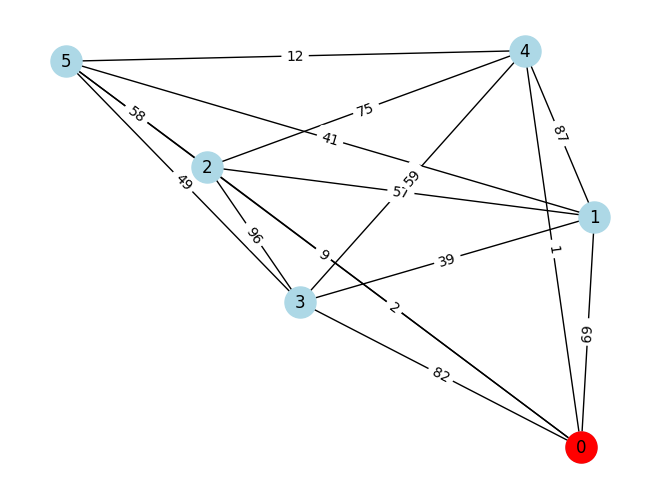

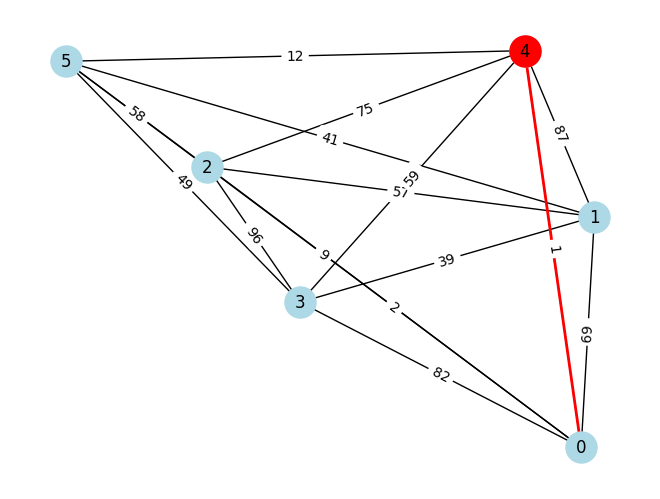

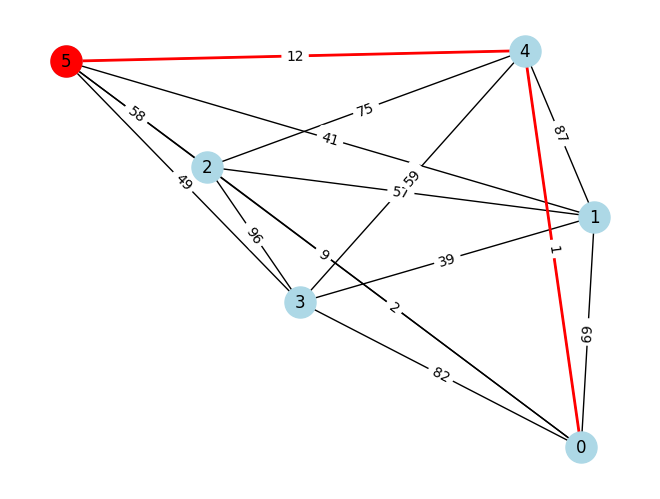

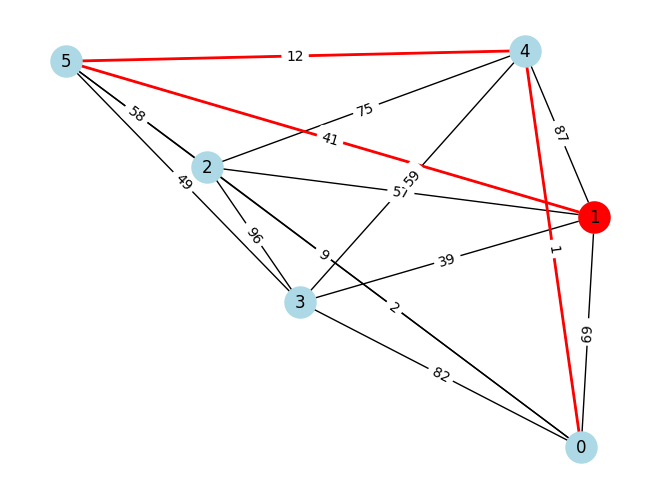

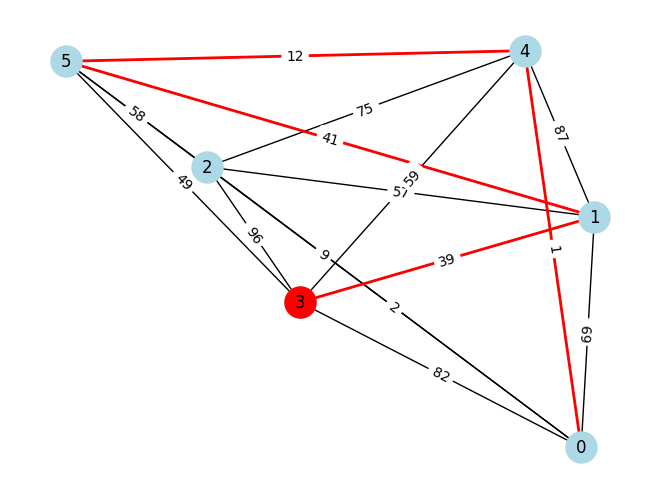

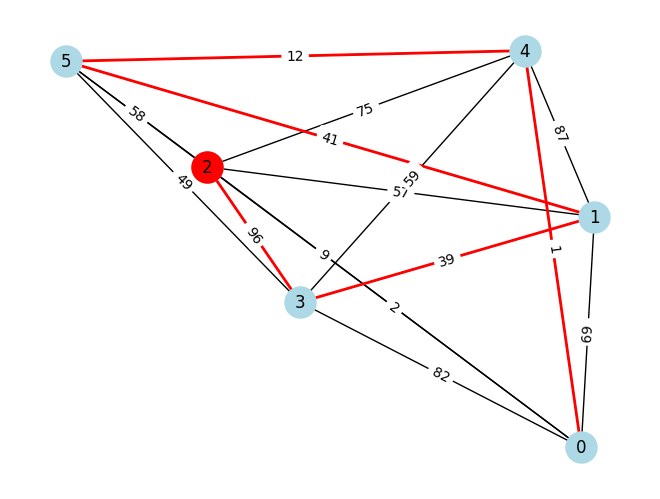

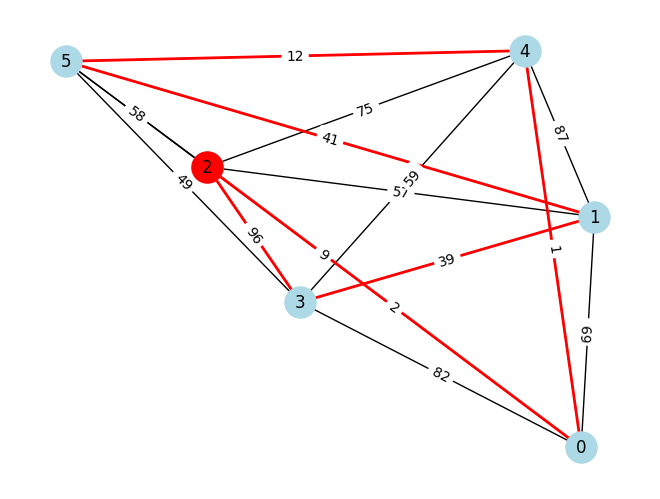


Contructive Heuristic Tour: [0, 4, 5, 1, 3, 2, 0]
Constructive Heuristic Tour Cost: 191


In [4]:
import random

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem


def generate_complete_graph(num_nodes, weight_range=(1, 100)):
    G = nx.complete_graph(num_nodes)
    for u, v in G.edges():
        G.edges[u, v]["weight"] = random.randint(*weight_range)
    return G


def plot_graph_step(G, tour, current_node, pos):
    plt.clf()

    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500)
    path_edges = list(zip(tour, tour[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
    nx.draw_networkx_nodes(
        G, pos, nodelist=[current_node], node_color="red", node_size=500
    )

    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.pause(0.5)


def calculate_tour_cost(G, tour):
    return sum(G[tour[i]][tour[i + 1]]["weight"] for i in range(len(tour) - 1))


def nearest_neighbor_tsp(G, start_node=None):
    if start_node is None:
        start_node = random.choice(list(G.nodes))

    pos = nx.spring_layout(G)
    plt.ion()
    plt.show()

    unvisited = set(G.nodes)
    unvisited.remove(start_node)
    tour = [start_node]
    current_node = start_node

    plot_graph_step(G, tour, current_node, pos)

    while unvisited:
        next_node = min(unvisited, key=lambda node: G[current_node][node]["weight"])
        unvisited.remove(next_node)
        tour.append(next_node)
        current_node = next_node

        plot_graph_step(G, tour, current_node, pos)

    tour.append(start_node)
    plot_graph_step(G, tour, current_node, pos)

    print(f"\nContructive Heuristic Tour: {tour}")
    tour_cost = calculate_tour_cost(G, tour)
    print(f"Constructive Heuristic Tour Cost: {tour_cost}")

    plt.ion()
    plt.show()


if __name__ == "__main__":
    G = generate_complete_graph(6)

    approx_tour = traveling_salesman_problem(G, cycle=True)
    approx_tour_cost = calculate_tour_cost(G, approx_tour)

    print(f"\nAprroximation Tour: {approx_tour}")
    print(f"Approximation Tour Cost: {approx_tour_cost}")

    nearest_neighbor_tsp(G, 0)

## Dynamic Programming

In [5]:
import itertools

def tsp_dp(graph):
    n = len(graph)
    # memo table to store minimum cost of visiting all nodes in a subset ending at a particular node
    memo = {}

    # Initialize memo table for the subsets of size 1 (starting from node 0)
    for i in range(1, n):
        memo[(1 << i, i)] = graph[0][i]

    # Iterate over subsets of increasing size (overlapping recursive case) 
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for j in subset:
                prev_bits = bits & ~(1 << j)
                min_dist = float('inf')
                for k in subset:
                    if k == j:
                        continue
                    current_dist = memo[(prev_bits, k)] + graph[k][j]
                    if current_dist < min_dist:
                        min_dist = current_dist
                memo[(bits, j)] = min_dist

    # Complete the tour by returning to the starting node
    bits = (1 << n) - 2
    min_dist = float('inf')
    for i in range(1, n):
        current_dist = memo[(bits, i)] + graph[i][0]
        if current_dist < min_dist:
            min_dist = current_dist

    return min_dist

# Example usage:
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print("The minimum cost to visit all cities is:", tsp_dp(graph))


The minimum cost to visit all cities is: 80
